In [1]:
import sys
sys.path.append('..')
from jaewook_header import *
%matplotlib inline

C:\Users\snu\AppData\Local\Continuum\anaconda3\envs\venv\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


C:\Users\snu\AppData\Local\Continuum\anaconda3\envs\venv\lib\site-packages\skimage\io\_io.py:132: UserWarning: l_spine_jpg_label_v3_fill/70_l.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\snu\AppData\Local\Continuum\anaconda3\envs\venv\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


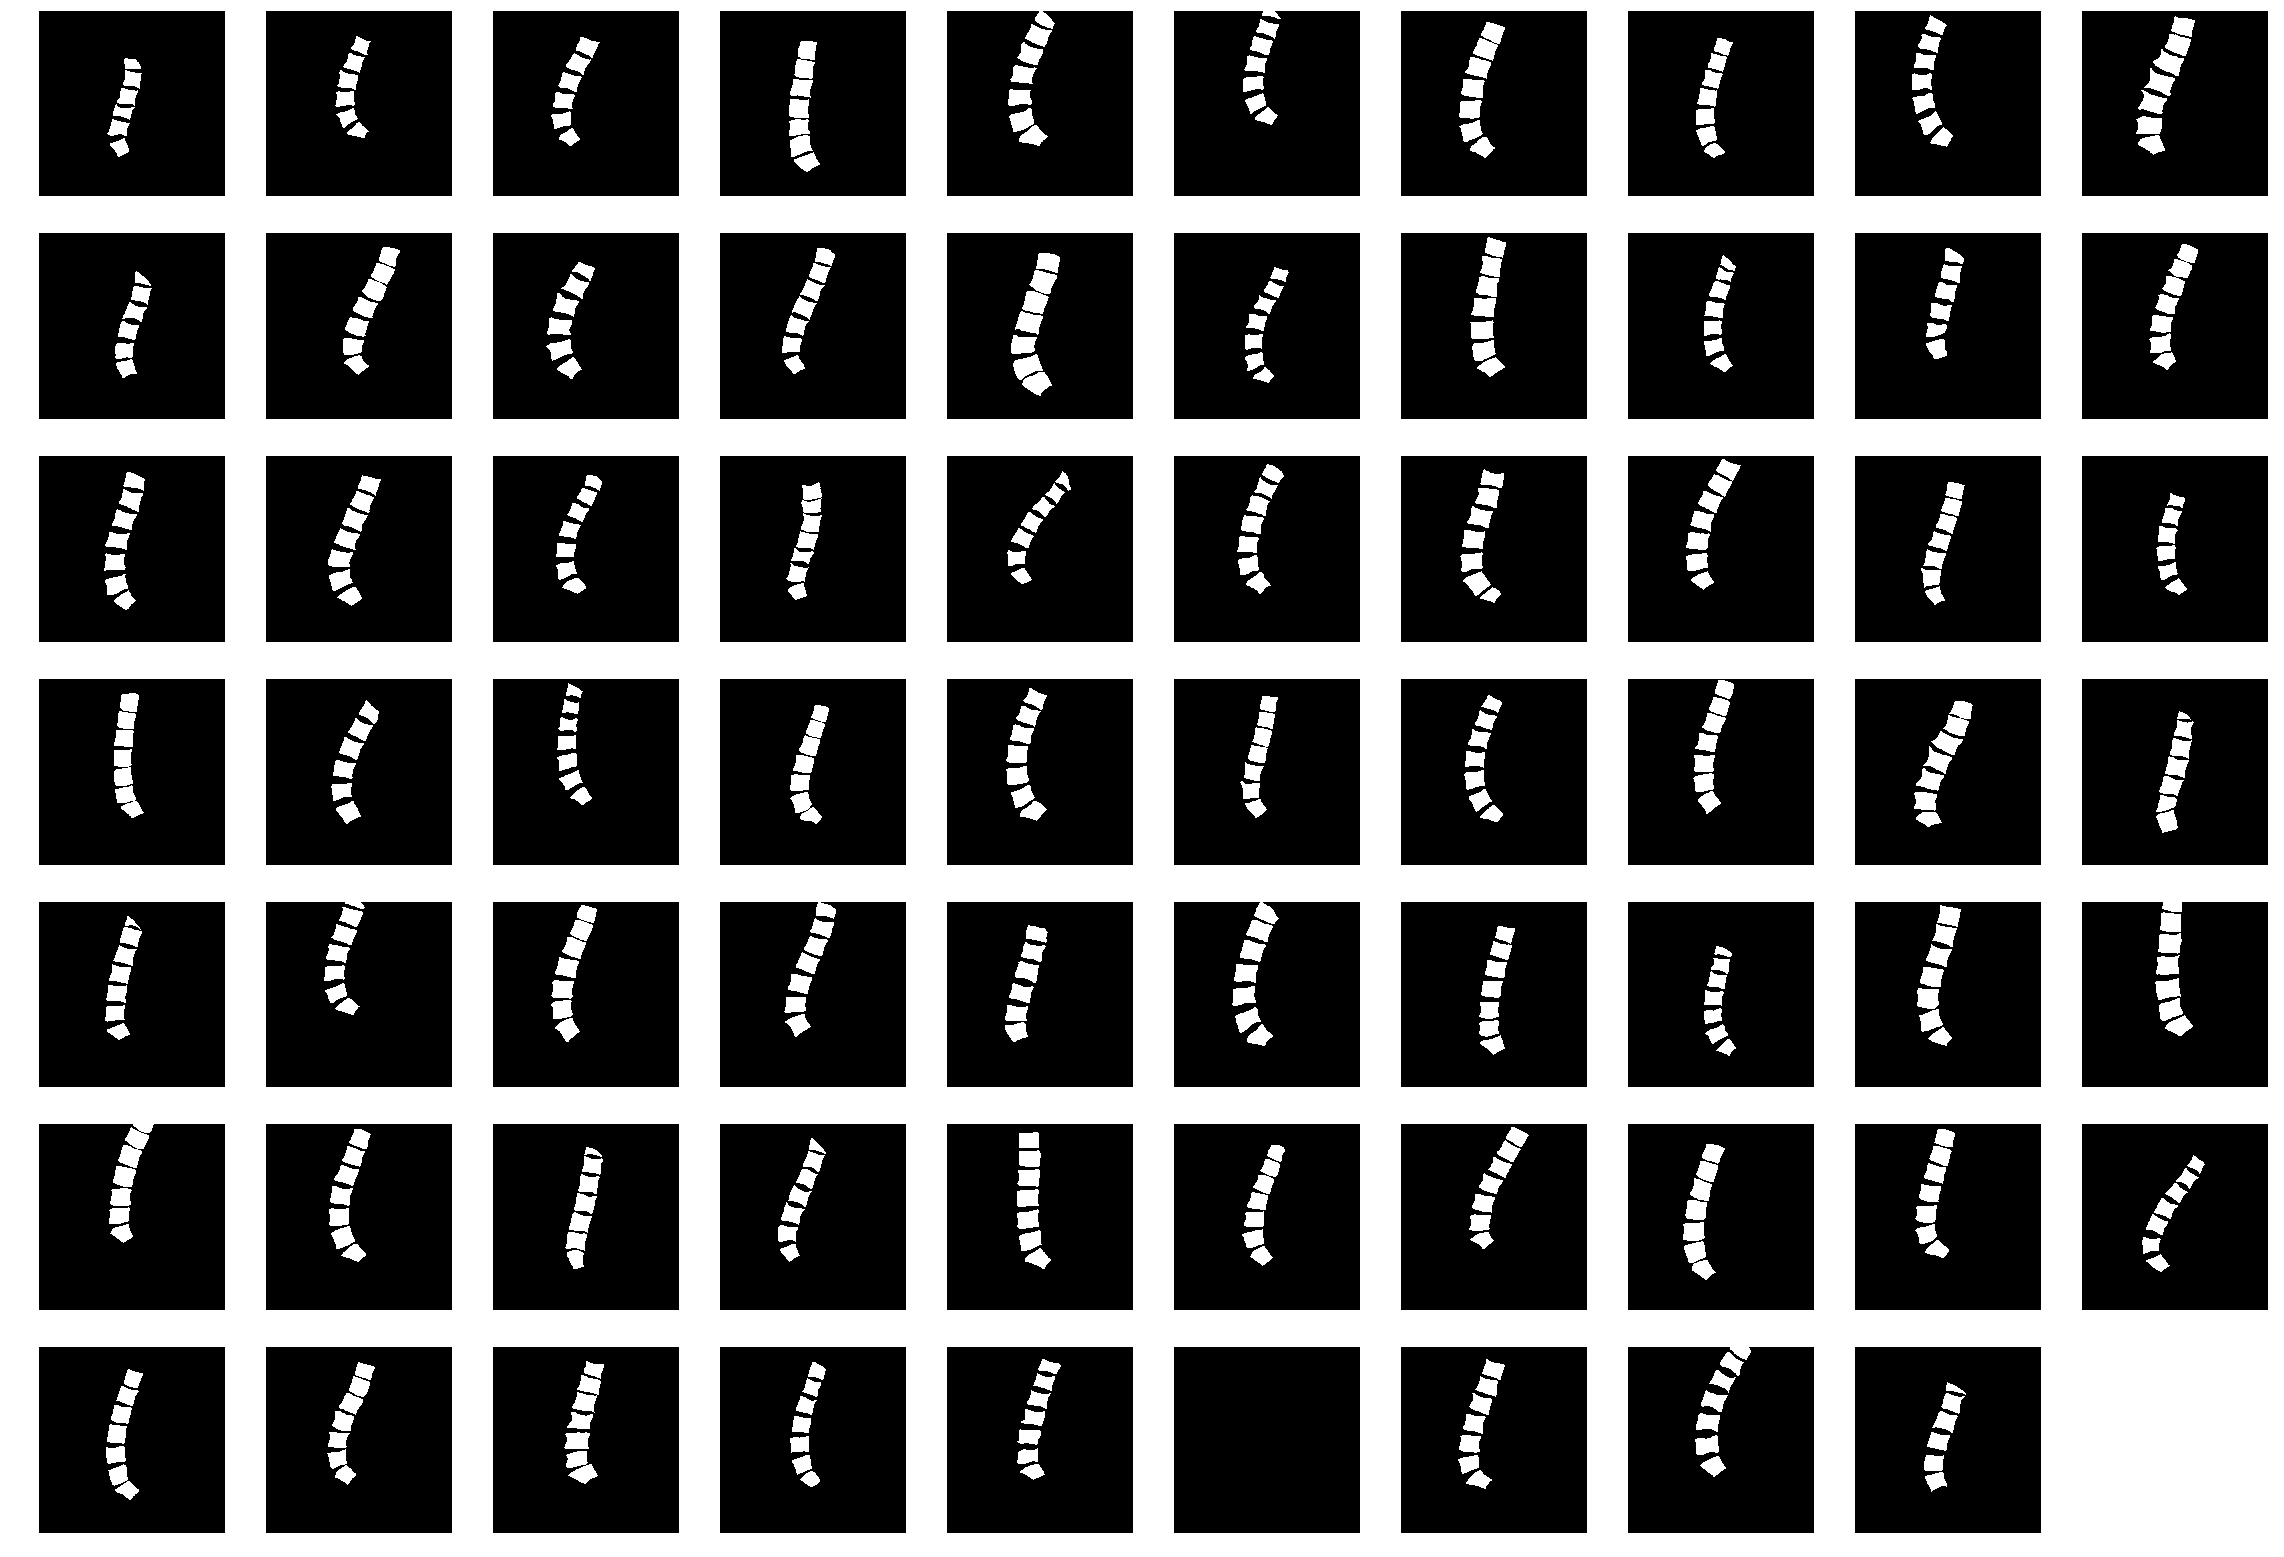

In [2]:
images=[]

kernel = np.ones((3,3),np.uint8)

for g in glob('l_spine_jpg_label_v3/*.jpg'):
    p,f=os.path.split(g)
    
    img=imread(g).astype(np.float32)/255.
    img2=(img[:,:,2]-img[:,:,0]>.4).astype(np.uint8)
    
    img3 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)
    img4, contours, hierarchy=cv2.findContours(img3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    contours2=[contours[i] for i in range(len(contours)) if hierarchy[0,i,3]==-1]
    img5=cv2.drawContours(np.zeros_like(img2),contours2,-1,255,-1)
    conn=cv2.connectedComponents(img5.astype(np.uint8),None)
    
    images.append(img5)
    imsave("l_spine_jpg_label_v3_fill/"+os.path.splitext(f)[0]+".png",img5)

images=np.array(images)
    
imshowx(images,7,10)